In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nayanitharushika
Your Kaggle Key: ··········


100%|██████████| 217M/217M [00:11<00:00, 20.5MB/s]


In [4]:
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [5]:
train_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/test"

In [13]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE,
                                                       subset='training',
                                                       validation_split=0.1,
                                                       seed=42)
validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE,
                                                       subset='validation',
                                                       validation_split=0.1,
                                                       seed=42)
test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [14]:
class_names= train_data.class_names
class_names

['cats', 'dogs']

In [15]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


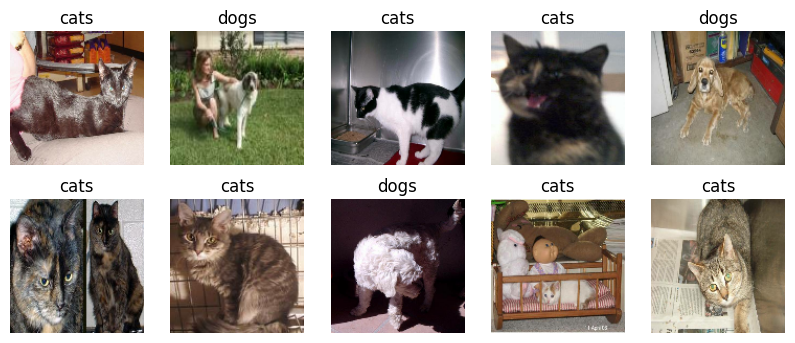

In [16]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [17]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [19]:
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [20]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[5.9286092e-04 3.3142301e-04 4.8521001e-04]
   [6.1370624e-04 3.5226837e-04 5.0605537e-04]
   [5.6420604e-04 3.0276817e-04 4.5655516e-04]
   ...
   [0.0000000e+00 1.5378702e-05 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[5.9129897e-04 3.2986110e-04 4.8364812e-04]
   [5.7405804e-04 3.1262013e-04 4.6640716e-04]
   [5.4324057e-04 2.8180267e-04 4.3558967e-04]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 4.9860632e-06 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[6.1495631e-04 3.5351838e-04 5.0730543e-04]
   [5.8863021e-04 3.2719231e-04 4.8097933e-04]
   [5.8499136e-04 3.2355345e-04 4.7734045e-04]
   ...
   [1.5378702e-05 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 1.5378702e-05 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  ...

  [[2.8381972e-03 2.6426965e-03 2.8500431e-03]
   [2.9521699e-03 2.7591463e-03 2.9786876e-03]
   [3.0321297e-

In [21]:
data_augmentation=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [22]:
model=tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [25]:
start_time=time.time()

history=model.fit(train_data,
                  epochs=20,
                  validation_data=validation_data)
end_time=time.time()

Epoch 1/20
225/225 [==============================] - 21s 50ms/step - loss: 0.6946 - accuracy: 0.5122 - val_loss: 0.6960 - val_accuracy: 0.5050
Epoch 2/20
225/225 [==============================] - 11s 47ms/step - loss: 0.6951 - accuracy: 0.4951 - val_loss: 0.6935 - val_accuracy: 0.4950
Epoch 3/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6943 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 4/20
225/225 [==============================] - 11s 48ms/step - loss: 0.6939 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 5/20
225/225 [==============================] - 11s 47ms/step - loss: 0.6952 - accuracy: 0.5157 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 6/20
225/225 [==============================] - 10s 44ms/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 7/20
225/225 [==============================] - 10s 44ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6939 - val_accuracy: 

In [26]:
history.history

{'loss': [0.6945720911026001,
  0.6950793862342834,
  0.694313645362854,
  0.6939221620559692,
  0.6951504349708557,
  0.693337082862854,
  0.6932305693626404,
  0.6938710808753967,
  0.6932761073112488,
  0.6932063102722168,
  0.6931874752044678,
  0.6936237215995789,
  0.6936104893684387,
  0.6931739449501038,
  0.6931714415550232,
  0.6931810975074768,
  0.6931756734848022,
  0.6931760907173157,
  0.6931803822517395,
  0.6931816935539246],
 'accuracy': [0.5122222304344177,
  0.49513888359069824,
  0.4940277636051178,
  0.5006944537162781,
  0.5156944394111633,
  0.4933333396911621,
  0.4970833361148834,
  0.5052777528762817,
  0.4927777647972107,
  0.4945833384990692,
  0.48722222447395325,
  0.5069444179534912,
  0.49291667342185974,
  0.4955555498600006,
  0.49222221970558167,
  0.4933333396911621,
  0.4975000023841858,
  0.4933333396911621,
  0.48847222328186035,
  0.4958333373069763],
 'val_loss': [0.6959564089775085,
  0.6934680342674255,
  0.6930997371673584,
  0.6931021809577

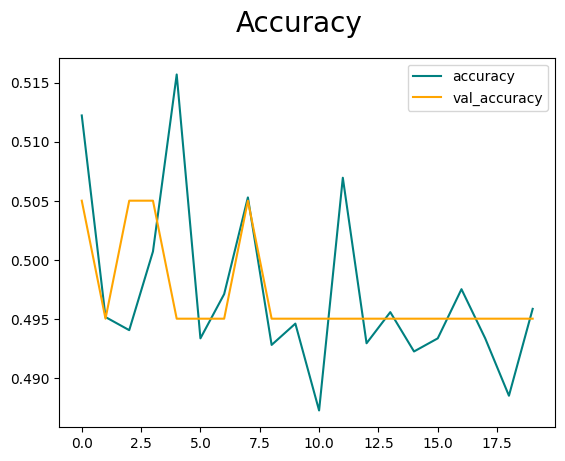

In [28]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

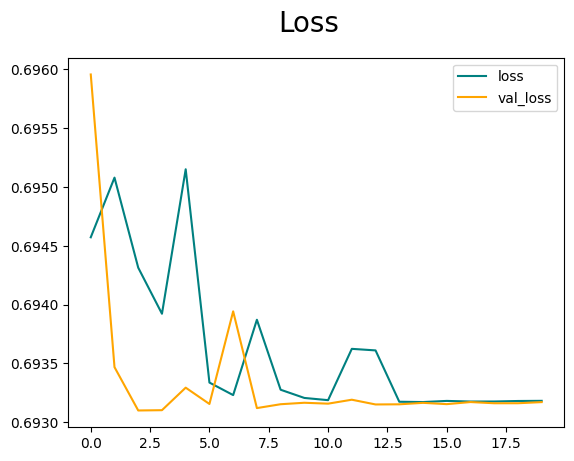

In [29]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

In [30]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

In [31]:
for batch in test_data.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 373ms/step


In [33]:
 precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [34]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [35]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [36]:
!pip install opencv-python

In [40]:
import cv2

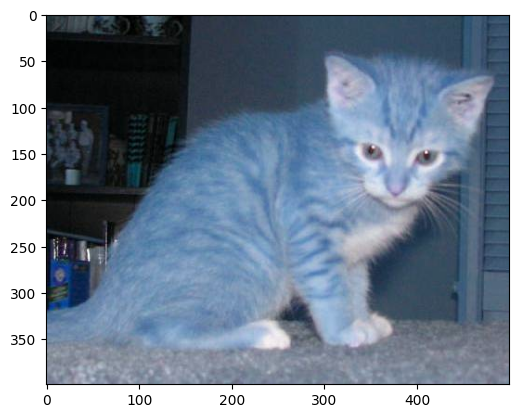

In [42]:
image= cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4003.jpg")
plt.imshow(image)
plt.show()

In [43]:
resized_image=tf.image.resize(image, IMAGE_SIZE)
scaled_image=resized_image/255

In [44]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.15981302, 0.23411459, 0.24587929],
        [0.14971493, 0.21621644, 0.22798115],
        [0.17982441, 0.2350167 , 0.24799183],
        ...,
        [0.20432009, 0.32196715, 0.42000636],
        [0.20423393, 0.321881  , 0.4199202 ],
        [0.19238664, 0.3100337 , 0.40807292]],

       [[0.1679934 , 0.23466007, 0.24642478],
        [0.13985644, 0.19867997, 0.21044467],
        [0.17941177, 0.22542892, 0.2411152 ],
        ...,
        [0.20629524, 0.3239423 , 0.4219815 ],
        [0.20508315, 0.3227302 , 0.42076942],
        [0.20461091, 0.32225797, 0.42029718]],

       [[0.14986165, 0.21015601, 0.22244132],
        [0.12994504, 0.18191971, 0.19582975],
        [0.1873279 , 0.22816737, 0.24385364],
        ...,
        [0.23621084, 0.3397954 , 0.4417562 ],
        [0.23330413, 0.3368887 , 0.43884948],
        [0.22210477, 0.33975184, 0.43779105]],

       ...,

       [[0.49244767, 0.51989865, 0.59440845],
        [0.48

In [45]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [47]:
y_hat=model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 20ms/step


In [48]:
y_hat

array([[0.43008742]], dtype=float32)

In [50]:
class_names

['cats', 'dogs']

In [51]:
if y_hat>=0.5:
  print(class_names[1])
else:
  print(class_names[0])

cats
